In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('SteamEnglishReviews.csv')
print(df.head())

   Unnamed: 0                  app_name language  \
0           3  The Witcher 3: Wild Hunt  english   
1           5  The Witcher 3: Wild Hunt  english   
2           6  The Witcher 3: Wild Hunt  english   
3          18  The Witcher 3: Wild Hunt  english   
4          20  The Witcher 3: Wild Hunt  english   

                                              review  timestamp_created  \
0  One of the best RPG's of all time, worthy of a...         1611379970   
1             good story, good graphics. lots to do.         1611379264   
2                                           dis gud,         1611379091   
3  favorite game of all time cant wait for the Ne...         1611373086   
4                          Why wouldn't you get this         1611371978   

   timestamp_updated  recommended  votes_helpful  votes_funny  comment_count  \
0         1611379970         True              0            0              0   
1         1611379264         True              0            0              0

In [2]:
print (df.columns)

Index(['Unnamed: 0', 'app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'author.num_games_owned',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'author.last_played'],
      dtype='object')


In [3]:
df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,The Witcher 3: Wild Hunt,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0,True,False,False,11,1,823.0,823.0,823.0,1.611379e+09
2,6,The Witcher 3: Wild Hunt,english,"dis gud,",1611379091,1611379091,True,0,0,0,True,False,False,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,The Witcher 3: Wild Hunt,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0,True,False,False,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,The Witcher 3: Wild Hunt,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0,True,False,False,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780435,19999987,The Elder Scrolls V: Skyrim Special Edition,english,I WANT A REFUND\n,1588779455,1588779455,False,0,1,0,True,False,False,15,2,1653.0,0.0,217.0,1.593258e+09
8780436,19999989,The Elder Scrolls V: Skyrim Special Edition,english,You know you want it.,1588778760,1588778760,True,1,1,0,False,False,False,64,1,2969.0,0.0,1163.0,1.589317e+09
8780437,19999990,The Elder Scrolls V: Skyrim Special Edition,english,Very cool dragon and theft,1588777285,1588777285,True,0,0,0,True,False,False,32,6,1165.0,0.0,1063.0,1.598537e+09
8780438,19999994,The Elder Scrolls V: Skyrim Special Edition,english,The game is great,1588776021,1588776021,True,0,0,0,True,False,False,25,7,1861.0,0.0,768.0,1.603818e+09


In [4]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780438e+06,8.780438e+06,8.769680e+06,8.780438e+06
mean,9.857102e+06,1.539505e+09,1.543040e+09,5.008932e+05,1.291368e+05,1.293550e-01,1.502837e+06,5.009029e+05,1.636568e+04,1.651123e+02,9.160439e+03,1.577832e+09
std,5.773377e+06,6.434651e+07,6.293887e+07,1.484232e+09,2.355034e+07,2.036609e+00,2.570764e+09,1.484232e+09,3.996454e+04,7.713387e+02,2.592765e+04,5.366909e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.153034e+06,1.498343e+09,1.504905e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.299000e+03,0.000000e+00,5.980000e+02,1.569880e+09
50%,9.572375e+06,1.562131e+09,1.568998e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,4.000000e+00,4.431000e+03,0.000000e+00,1.972000e+03,1.599436e+09
75%,1.529647e+07,1.591020e+09,1.592911e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.870000e+02,1.100000e+01,1.496100e+04,0.000000e+00,7.126000e+03,1.609085e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,4.398047e+12,4.294967e+09,1.432000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611430e+09


## Removing Outliers

In [5]:
#30000
recs = df["votes_helpful"]
unique, counts = np.unique(recs, return_counts=True)
print(unique)

[            0             1             2 ...         28211         29608
 4398046511106]


In [6]:
#16000
recs = df["votes_funny"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[1650:])

[     13635      13795      13806      14376      15417      15707
 4294967288 4294967289 4294967290 4294967291 4294967292 4294967293
 4294967294 4294967295]


In [7]:
#6000
recs = df["author.num_reviews"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[720:])

[         3764          3766          3767          3772          3774
          4137          5236 4398046511105]


In [8]:
#23000
recs = df["author.num_games_owned"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[5700:])

[        15523         15524         15871         15874         15887
         15919         15992         16113         16615         16617
         16811         16818         16821         16869         17197
         17206         17239         17312         17314         17318
         17319         17320         17321         17340         17343
         17344         17767         18640         18664         18666
         18956         19022         19024         19451         19465
         20391         20417         20420         20969         20972
         21865         21979         21980         22024 4398046511151
 4398046511170 4398046511619]


In [9]:
recs = df["author.playtime_at_review"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[100000:])

[102338. 102339. 102340. ...     nan     nan     nan]


In [10]:
# Dropped all of the outliers in the dataset
df = df[df["votes_helpful"] < 30000]
df = df[df["votes_funny"] < 16000]
df = df[df["author.num_reviews"] < 6000]
df = df[df["author.num_games_owned"] < 23000]
# Get rid of the nan playtime values
df = df[np.isnan(df["author.playtime_at_review"]) == False]
# 10 years of play time
df = df[df["author.playtime_at_review"] < 60000]

In [11]:
df["recommended"] = df["recommended"].astype(int)

In [26]:
classifier_cols = ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]

In [27]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502029e+06,8.502029e+06,8.502031e+06,8.502029e+06
mean,9.870912e+06,1.539283e+09,1.542497e+09,8.946034e-01,1.793062e+00,7.550092e-01,1.245168e-01,1.640030e+02,1.175650e+01,1.203496e+04,1.387828e+02,5.858401e+03,1.577191e+09
std,5.763546e+06,6.444947e+07,6.319413e+07,3.070638e-01,4.427301e+01,3.345614e+01,1.956048e+00,3.085293e+02,3.480477e+01,2.293986e+04,6.578127e+02,9.740206e+03,5.316229e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.174430e+06,1.498099e+09,1.503770e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.248000e+03,0.000000e+00,5.730000e+02,1.567947e+09
50%,9.581016e+06,1.562080e+09,1.566538e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,5.000000e+00,4.140000e+03,0.000000e+00,1.846000e+03,1.598745e+09
75%,1.528021e+07,1.591210e+09,1.592918e+09,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02,1.100000e+01,1.324400e+04,0.000000e+00,6.236000e+03,1.608913e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,1.000000e+00,2.960800e+04,1.570700e+04,1.432000e+03,2.202400e+04,5.236000e+03,2.376680e+06,2.235300e+04,5.999900e+04,1.611430e+09


## Dataset Analysis

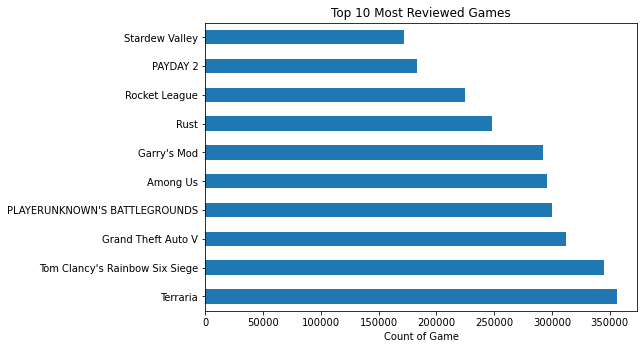

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 10 Most Reviewed Games")
plt.xlabel('Count of Game')
df['app_name'].value_counts()[:10].plot(kind='barh')

In [29]:
recs = df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 896085 Recommendations: 7605946


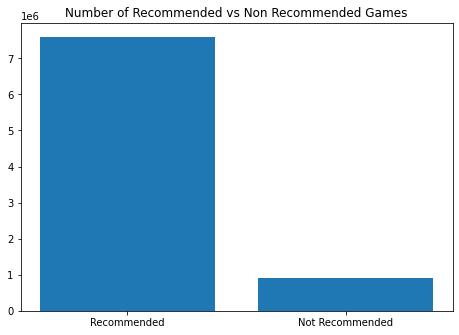

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title("Number of Recommended vs Non Recommended Games")

unique, counts = np.unique(df["recommended"], return_counts=True)
sizes = [counts[1], counts[0]]
labels = ['Recommended', 'Not Recommended']

ax.bar(labels,sizes)
plt.show()

## Trimming dataset down

In [31]:
len(df)

8502031

In [32]:
not_rec = df[df["recommended"]==0]
num_no_rec= len(not_rec)

#sample function shuffles the values
yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]
num_yes_rec = len(df[df["recommended"]==1])

# Cuts the dataset down to 500000 values while keeping the ratio of recommended vs nonrecommended
var = int((num_no_rec/len(df)) * 500000)
no_split = not_rec.sample(frac=1)[0:var]
yes_split = df[df["recommended"]==1].sample(frac=1)[0:500000 - var]

df_equal = pd.concat([no_split,yes_split])

# The left over data will be used for prediction testing of our classifiers
no_split_leftover = not_rec.sample(frac=1)[var:num_no_rec]
yes_split_leftover = df[df["recommended"]==1].sample(frac=1)[500000 - var:num_yes_rec]

# Unclassified data set
df_test = pd.concat([no_split_leftover, yes_split_leftover])

In [33]:
recs = df_test["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Unclassified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])

Unclassified Data Set = Non-recommendations: 843387 Recommendations: 7158644


In [34]:
recs = df_equal["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Classified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Classified Data Set = Non-recommendations: 52698 Recommendations: 447302


In [35]:
df_equal

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
7509240,17245364,Fallout 4,english,Eat my ass Bethesda. Just release Skyrim again...,1496591720,1498194425,0,0,0,0,True,False,False,167,57,333.0,0.0,315.0,1.493766e+09
7316643,16864977,No Man's Sky,english,The worst experience for a game at launch. Mul...,1472511440,1472511440,0,3,0,0,True,False,False,220,10,1016.0,0.0,661.0,1.534659e+09
1388798,3157329,Cube World,english,It wasn't worth the wait.,1569870168,1569870168,0,1,0,0,False,False,False,365,86,414.0,0.0,414.0,1.569460e+09
1948300,4476612,Euro Truck Simulator 2,english,Almost as good as big rigs over the road racin...,1403281224,1413182006,0,3,0,0,True,False,False,746,22,117.0,0.0,117.0,1.413183e+09
7266492,16780410,No Man's Sky,english,I was all excited about this game. From a deve...,1577383738,1577383738,0,8,1,0,True,False,False,89,3,602.0,0.0,602.0,1.577351e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662072,15483812,Monster Hunter: World,english,its good,1584984469,1584984469,1,2,0,0,True,False,False,65,4,5272.0,0.0,3389.0,1.607661e+09
8196054,18773897,Terraria,english,angler took my family please help,1561857447,1561857447,1,1,0,0,True,False,False,240,2,35338.0,0.0,26067.0,1.599264e+09
8061968,18546139,Terraria,english,cgfxhnj n,1589915660,1589915660,1,0,0,0,True,False,False,7,3,944.0,0.0,222.0,1.602373e+09
3901977,8506302,Helltaker,english,Art work and music is very good. I'm not a puz...,1610015770,1610015770,1,0,0,0,False,False,False,9,1,317.0,317.0,317.0,1.610015e+09


In [134]:
#sample function shuffles the values
shuffled = df_equal.sample(frac=1)[0:len(df_equal)]

# Trimmed dataset for testing purposes
#updated_df = shuffled[:100000]

updated_df = shuffled

## Normilazation

In [124]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
6896163,16020126,Cities: Skylines,english,nc game have many mod,1428817897,1428817897,1,0,0,0,True,False,False,32,14,4514.0,0.0,1206.0,1.577789e+09
8183309,18752087,Terraria,english,Amazing game with everlasting possibilities.,1563856571,1563856571,1,0,0,0,True,False,False,16,2,8467.0,0.0,4669.0,1.604638e+09
1835673,4027772,Slay the Spire,english,goodo,1593262176,1593262176,1,0,0,0,True,False,False,49,3,1613.0,0.0,697.0,1.604589e+09
8612615,19664000,The Sims(TM) 3,english,it ok.,1587756949,1587756949,1,0,1,0,True,False,False,9,2,18075.0,0.0,18075.0,1.571801e+09
3614765,7935221,Raft,english,very good game but needs more work.\nwill be t...,1609494461,1609494461,1,1,0,0,True,False,True,80,14,2502.0,290.0,1520.0,1.610193e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8345934,19056330,PAYDAY 2,english,Its a huge mess and i love it\n,1607359928,1607359928,1,0,0,0,True,False,False,34,2,3953.0,0.0,3953.0,1.576851e+09
5390302,11507436,FTL: Faster Than Light,english,Best ten dollars I've spent on Steam.,1415770471,1415770471,1,0,0,0,True,False,False,84,17,2024.0,0.0,897.0,1.606363e+09
4328981,9464030,Dishonored,english,Wanna feel like a REAL ASSASSIN but with SUPER...,1517968039,1563017437,1,0,0,0,False,False,False,135,14,5571.0,0.0,2940.0,1.594004e+09
5354283,11452772,The Elder Scrolls V: Skyrim,english,"Skyrim needs no introduction, and for a damn g...",1321589644,1392180936,1,0,0,0,False,False,False,21,8,17684.0,0.0,7413.0,1.465331e+09


In [125]:
from sklearn import preprocessing

def calc_norm(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    df_norm = preprocessing.normalize(dataframe[classifier_cols])
    df_norm = pd.DataFrame(df_norm)

    dataframe[classifier_cols] = np.array(df_norm)
    return dataframe

updated_df = calc_norm(updated_df)
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
6896163,16020126,Cities: Skylines,english,nc game have many mod,1428817897,1428817897,1,0.000000,0.000000,0,True,False,False,0.026523,0.011604,4514.0,0.0,0.999581,1.577789e+09
8183309,18752087,Terraria,english,Amazing game with everlasting possibilities.,1563856571,1563856571,1,0.000000,0.000000,0,True,False,False,0.003427,0.000428,8467.0,0.0,0.999994,1.604638e+09
1835673,4027772,Slay the Spire,english,goodo,1593262176,1593262176,1,0.000000,0.000000,0,True,False,False,0.070128,0.004294,1613.0,0.0,0.997529,1.604589e+09
8612615,19664000,The Sims(TM) 3,english,it ok.,1587756949,1587756949,1,0.000000,0.000055,0,True,False,False,0.000498,0.000111,18075.0,0.0,1.000000,1.571801e+09
3614765,7935221,Raft,english,very good game but needs more work.\nwill be t...,1609494461,1609494461,1,0.000657,0.000000,0,True,False,True,0.052557,0.009197,2502.0,290.0,0.998575,1.610193e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8345934,19056330,PAYDAY 2,english,Its a huge mess and i love it\n,1607359928,1607359928,1,0.000000,0.000000,0,True,False,False,0.008601,0.000506,3953.0,0.0,0.999963,1.576851e+09
5390302,11507436,FTL: Faster Than Light,english,Best ten dollars I've spent on Steam.,1415770471,1415770471,1,0.000000,0.000000,0,True,False,False,0.093221,0.018866,2024.0,0.0,0.995467,1.606363e+09
4328981,9464030,Dishonored,english,Wanna feel like a REAL ASSASSIN but with SUPER...,1517968039,1563017437,1,0.000000,0.000000,0,False,False,False,0.045870,0.004757,5571.0,0.0,0.998936,1.594004e+09
5354283,11452772,The Elder Scrolls V: Skyrim,english,"Skyrim needs no introduction, and for a damn g...",1321589644,1392180936,1,0.000000,0.000000,0,False,False,False,0.002833,0.001079,17684.0,0.0,0.999995,1.465331e+09


## Standardization

In [135]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3467164,7616178,Rust,english,If you plan on playing this game solo dont bot...,1519513312,1519513312,1,0,0,0,True,False,False,342,7,6523.0,0.0,5941.0,1.520217e+09
1744903,3877245,RimWorld,english,Solid game with hours and hours of replayability.,1587323540,1587323540,1,0,0,0,True,False,False,163,5,28285.0,0.0,21794.0,1.601531e+09
5727852,12276888,Just Shapes & Beats,english,This game is really fun. The story mode seems ...,1581896768,1581896768,1,0,0,0,True,False,False,6,5,1312.0,0.0,436.0,1.604077e+09
2328930,5424435,DOOM Eternal,english,Do I really need to tell you why it's good? It...,1586134759,1586134759,1,0,0,0,False,True,False,41,9,7970.0,0.0,1948.0,1.603255e+09
4512586,9792958,Rocket League,english,Yes,1606590280,1606590280,1,0,0,0,True,False,False,18,1,31228.0,74.0,30170.0,1.610709e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314187,7334524,Rust,english,"frickin awesome\noh and penis too, balls even",1605845557,1605845669,1,0,1,0,True,False,False,14,2,1581.0,0.0,643.0,1.606590e+09
3513146,7715678,Rust,english,The game itself is full of bugs and Ark is muc...,1463762923,1463762923,0,1,0,0,False,False,True,129,10,2270.0,0.0,1082.0,1.553182e+09
3145433,7034385,Among Us,english,A fun and cute little murder mystery that keep...,1601155496,1601155496,1,0,0,0,True,False,False,108,2,852.0,0.0,309.0,1.601790e+09
4380353,9554459,Undertale,english,"COOL game with a good story ,boss fighting's b...",1604144637,1604151516,1,0,0,0,True,False,False,21,3,2752.0,1.0,528.0,1.610538e+09


In [137]:
def calc_stand(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    #df_stand = preprocessing.normalize(dataframe[classifier_cols])
    dataframe[classifier_cols] = preprocessing.StandardScaler().fit_transform(dataframe[classifier_cols])
    #df_stand = pd.DataFrame(df_norm)

   # dataframe[classifier_cols] = np.array(df_stand)
    return dataframe

updated_df = calc_stand(updated_df)
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3467164,7616178,Rust,english,If you plan on playing this game solo dont bot...,1519513312,1519513312,1,-0.049258,-0.025077,0,True,False,False,0.578372,-0.135172,6523.0,0.0,0.009599,1.520217e+09
1744903,3877245,RimWorld,english,Solid game with hours and hours of replayability.,1587323540,1587323540,1,-0.049258,-0.025077,0,True,False,False,-0.002847,-0.192095,28285.0,0.0,1.638963,1.601531e+09
5727852,12276888,Just Shapes & Beats,english,This game is really fun. The story mode seems ...,1581896768,1581896768,1,-0.049258,-0.025077,0,True,False,False,-0.512631,-0.192095,1312.0,0.0,-0.556202,1.604077e+09
2328930,5424435,DOOM Eternal,english,Do I really need to tell you why it's good? It...,1586134759,1586134759,1,-0.049258,-0.025077,0,False,True,False,-0.398985,-0.078248,7970.0,0.0,-0.400799,1.603255e+09
4512586,9792958,Rocket League,english,Yes,1606590280,1606590280,1,-0.049258,-0.025077,0,True,False,False,-0.473666,-0.305941,31228.0,74.0,2.499845,1.610709e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314187,7334524,Rust,english,"frickin awesome\noh and penis too, balls even",1605845557,1605845669,1,-0.049258,0.007488,0,True,False,False,-0.486654,-0.277480,1581.0,0.0,-0.534927,1.606590e+09
3513146,7715678,Rust,english,The game itself is full of bugs and Ark is muc...,1463762923,1463762923,0,-0.022432,-0.025077,0,False,False,True,-0.113246,-0.049787,2270.0,0.0,-0.489807,1.553182e+09
3145433,7034385,Among Us,english,A fun and cute little murder mystery that keep...,1601155496,1601155496,1,-0.049258,-0.025077,0,True,False,False,-0.181433,-0.277480,852.0,0.0,-0.569255,1.601790e+09
4380353,9554459,Undertale,english,"COOL game with a good story ,boss fighting's b...",1604144637,1604151516,1,-0.049258,-0.025077,0,True,False,False,-0.463925,-0.249018,2752.0,1.0,-0.546746,1.610538e+09


## Sentiment Analysis

In [138]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text = "I love you so much"

s = TextBlob("I love you so much")
print("Textblob:", s.sentiment)

s1 = SentimentIntensityAnalyzer()
sentiment_dict = s1.polarity_scores(text)
print("VADER:", sentiment_dict)
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

Textblob: Sentiment(polarity=0.35, subjectivity=0.4)
VADER: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Positive


In [139]:
#polarityT = [TextBlob(str(review)).polarity for review in updated_df["review"]]
#updated_df["polarityT"] = polarityT
#updated_df

In [140]:
def calc_polarity(dataframe):
    polarityV = []
    polarityV_label = []
    s = SentimentIntensityAnalyzer()
    for review in dataframe["review"]:
        sent_dict = s.polarity_scores(str(review))
        polarityV.append(sent_dict['compound'])

    dataframe["polarityV"] = polarityV
    return dataframe

updated_df = calc_polarity(updated_df)
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
3467164,7616178,Rust,english,If you plan on playing this game solo dont bot...,1519513312,1519513312,1,-0.049258,-0.025077,0,True,False,False,0.578372,-0.135172,6523.0,0.0,0.009599,1.520217e+09,-0.7867
1744903,3877245,RimWorld,english,Solid game with hours and hours of replayability.,1587323540,1587323540,1,-0.049258,-0.025077,0,True,False,False,-0.002847,-0.192095,28285.0,0.0,1.638963,1.601531e+09,0.1531
5727852,12276888,Just Shapes & Beats,english,This game is really fun. The story mode seems ...,1581896768,1581896768,1,-0.049258,-0.025077,0,True,False,False,-0.512631,-0.192095,1312.0,0.0,-0.556202,1.604077e+09,0.9105
2328930,5424435,DOOM Eternal,english,Do I really need to tell you why it's good? It...,1586134759,1586134759,1,-0.049258,-0.025077,0,False,True,False,-0.398985,-0.078248,7970.0,0.0,-0.400799,1.603255e+09,0.8555
4512586,9792958,Rocket League,english,Yes,1606590280,1606590280,1,-0.049258,-0.025077,0,True,False,False,-0.473666,-0.305941,31228.0,74.0,2.499845,1.610709e+09,0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314187,7334524,Rust,english,"frickin awesome\noh and penis too, balls even",1605845557,1605845669,1,-0.049258,0.007488,0,True,False,False,-0.486654,-0.277480,1581.0,0.0,-0.534927,1.606590e+09,0.6590
3513146,7715678,Rust,english,The game itself is full of bugs and Ark is muc...,1463762923,1463762923,0,-0.022432,-0.025077,0,False,False,True,-0.113246,-0.049787,2270.0,0.0,-0.489807,1.553182e+09,-0.9395
3145433,7034385,Among Us,english,A fun and cute little murder mystery that keep...,1601155496,1601155496,1,-0.049258,-0.025077,0,True,False,False,-0.181433,-0.277480,852.0,0.0,-0.569255,1.601790e+09,0.6794
4380353,9554459,Undertale,english,"COOL game with a good story ,boss fighting's b...",1604144637,1604151516,1,-0.049258,-0.025077,0,True,False,False,-0.463925,-0.249018,2752.0,1.0,-0.546746,1.610538e+09,0.8452


## Naive Bayes Classification

In [141]:
data_NB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB = updated_df["recommended"]

X_NB = np.array(data_NB)
Y_NB = np.array(labels_NB)

In [142]:
x_train_NB, x_test_NB, y_train_NB, y_test_NB = sklearn.model_selection.train_test_split(X_NB, Y_NB, test_size = 0.20, random_state = 0)

In [143]:
x_train_NB

array([[-0.04925846, -0.0250772 , -0.5158778 , -0.33995394, -0.27747955,
         0.7264    ],
       [-0.04925846, -0.0250772 , -0.28858549, -0.53009609, -0.24901797,
         0.9384    ],
       [-0.04925846, -0.0250772 , -0.4866545 ,  2.98958927, -0.30594114,
         0.        ],
       ...,
       [-0.0224316 ,  0.0074878 ,  1.95511428, -0.59649168,  0.32021371,
         0.5946    ],
       [-0.04925846, -0.0250772 , -0.17818637, -0.10510269,  0.00713629,
         0.        ],
       [-0.0224316 ,  0.0074878 , -0.41197274, -0.37161004, -0.22055638,
         0.        ]])

In [144]:
y_test_NB

array([1, 1, 1, ..., 1, 1, 1])

In [145]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train_NB, y_train_NB)

GaussianNB()

In [146]:
x_test_NB

array([[-0.04925846, -0.0250772 ,  0.26665715,  0.02368007, -0.27747955,
         0.8934    ],
       [-0.0224316 ,  0.0074878 , -0.23663296, -0.53585175, -0.24901797,
         0.        ],
       [-0.04925846,  0.0074878 ,  0.45823209, -0.31364238, -0.07824846,
        -0.6249    ],
       ...,
       [ 0.03122212, -0.0250772 ,  6.45874899, -0.5722357 , -0.1920948 ,
         0.972     ],
       [-0.04925846, -0.0250772 , -0.45418417, -0.56627449, -0.16363322,
         0.        ],
       [-0.0224316 , -0.0250772 , -0.33729098, -0.56123829,  4.81714396,
         0.8308    ]])

In [147]:
y_test_NB[:40]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [148]:
y_pred_NB = classifier.predict(x_test_NB)
y_pred_NB[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_NB, y_pred_NB)
ac = accuracy_score(y_test_NB, y_pred_NB)
print(ac)

0.88757


In [150]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_NB, y_pred_NB))
print("Precision:",metrics.precision_score(y_test_NB, y_pred_NB))
print("Recall:",metrics.recall_score(y_test_NB, y_pred_NB))
print("F1:",metrics.f1_score(y_test_NB, y_pred_NB))

Accuracy: 0.88757
Precision: 0.9009092215175585
Recall: 0.9822437539859248
F1: 0.9398200435706524


## Classifier testing on untrained data

In [151]:
# Shuffle the data around
df_test_NB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_NB = df_test_NB[df_test_NB["recommended"]==1]
no_recs_NB = df_test_NB[df_test_NB["recommended"]==0]
df_test_NB = pd.concat([yes_recs_NB[:5], no_recs_NB[:5]])

In [152]:
#df_test_NB = calc_norm(df_test_NB)
df_test_NB = calc_stand(df_test_NB)
df_test_NB = calc_polarity(df_test_NB)

In [153]:
df_test_NB[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
3029123,Among Us,"Great game. Lots of fun, and challenging.",0.8402,1,-0.594737,0.0,-0.630334,-0.400191,-0.787765
6089516,Grand Theft Auto V,Love it Especially ONLINE!,0.6696,1,-0.594737,0.0,-0.814936,-0.377835,0.980687
1506238,The Binding of Isaac: Rebirth,This game is very hard.,-0.1761,1,-0.594737,0.0,-0.351752,-0.175839,-0.787765
4795317,Dead Cells,Overall Thoughts: Masterpiece In-Progress \n(R...,0.9782,1,0.726900,0.0,1.860122,-0.303732,-0.466228
1517766,To the Moon,It is an adorable game!!!,0.6219,1,-0.594737,0.0,-0.657185,-0.437867,-0.787765
1194727,Getting Over It with Bennett Foddy,"This game is not worth your time, if you want ...",-0.4140,0,-0.594737,0.0,-0.465870,-0.221572,-0.144692
7191656,ARK: Survival Evolved,This game has been barren and buggy from the s...,0.0000,0,2.709356,0.0,1.826558,-0.269915,2.427603
7386476,Frostpunk,"This game crashes constantly, like multiple ti...",0.3612,0,0.066082,0.0,0.618250,-0.425271,0.659150
6499968,PLAYERUNKNOWN'S BATTLEGROUNDS,I would like to be able to give this game an e...,-0.6946,0,0.066082,0.0,-0.573275,2.989490,-0.626997
8416519,PAYDAY 2,Just could not get into this game. instruction...,-0.6697,0,-0.594737,0.0,-0.811580,-0.377268,-0.466228


In [154]:
data_NB_UNT = df_test_NB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB_UNT = df_test_NB["recommended"]

X_NB_UNT = np.array(data_NB_UNT)
Y_NB_UNT = np.array(labels_NB_UNT)

In [155]:
df_test_NB[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
3029123,"Great game. Lots of fun, and challenging.",1,-0.594737,0.0,-0.630334,-0.400191,-0.787765,0.8402
6089516,Love it Especially ONLINE!,1,-0.594737,0.0,-0.814936,-0.377835,0.980687,0.6696
1506238,This game is very hard.,1,-0.594737,0.0,-0.351752,-0.175839,-0.787765,-0.1761
4795317,Overall Thoughts: Masterpiece In-Progress \n(R...,1,0.726900,0.0,1.860122,-0.303732,-0.466228,0.9782
1517766,It is an adorable game!!!,1,-0.594737,0.0,-0.657185,-0.437867,-0.787765,0.6219
1194727,"This game is not worth your time, if you want ...",0,-0.594737,0.0,-0.465870,-0.221572,-0.144692,-0.4140
7191656,This game has been barren and buggy from the s...,0,2.709356,0.0,1.826558,-0.269915,2.427603,0.0000
7386476,"This game crashes constantly, like multiple ti...",0,0.066082,0.0,0.618250,-0.425271,0.659150,0.3612
6499968,I would like to be able to give this game an e...,0,0.066082,0.0,-0.573275,2.989490,-0.626997,-0.6946
8416519,Just could not get into this game. instruction...,0,-0.594737,0.0,-0.811580,-0.377268,-0.466228,-0.6697


In [156]:
y_pred_NB_UNT = classifier.predict(X_NB_UNT)
print(y_pred_NB_UNT)

[1 1 1 1 1 1 0 1 1 1]


In [157]:
Y_NB_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [158]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT))
print("Precision:",metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT))
print("Recall:",metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT))
print("F1:",metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT))

Accuracy: 0.6
Precision: 0.5555555555555556
Recall: 1.0
F1: 0.7142857142857143


## XGBoost Classification

In [159]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
3467164,7616178,Rust,english,If you plan on playing this game solo dont bot...,1519513312,1519513312,1,-0.049258,-0.025077,0,True,False,False,0.578372,-0.135172,6523.0,0.0,0.009599,1.520217e+09,-0.7867
1744903,3877245,RimWorld,english,Solid game with hours and hours of replayability.,1587323540,1587323540,1,-0.049258,-0.025077,0,True,False,False,-0.002847,-0.192095,28285.0,0.0,1.638963,1.601531e+09,0.1531
5727852,12276888,Just Shapes & Beats,english,This game is really fun. The story mode seems ...,1581896768,1581896768,1,-0.049258,-0.025077,0,True,False,False,-0.512631,-0.192095,1312.0,0.0,-0.556202,1.604077e+09,0.9105
2328930,5424435,DOOM Eternal,english,Do I really need to tell you why it's good? It...,1586134759,1586134759,1,-0.049258,-0.025077,0,False,True,False,-0.398985,-0.078248,7970.0,0.0,-0.400799,1.603255e+09,0.8555
4512586,9792958,Rocket League,english,Yes,1606590280,1606590280,1,-0.049258,-0.025077,0,True,False,False,-0.473666,-0.305941,31228.0,74.0,2.499845,1.610709e+09,0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314187,7334524,Rust,english,"frickin awesome\noh and penis too, balls even",1605845557,1605845669,1,-0.049258,0.007488,0,True,False,False,-0.486654,-0.277480,1581.0,0.0,-0.534927,1.606590e+09,0.6590
3513146,7715678,Rust,english,The game itself is full of bugs and Ark is muc...,1463762923,1463762923,0,-0.022432,-0.025077,0,False,False,True,-0.113246,-0.049787,2270.0,0.0,-0.489807,1.553182e+09,-0.9395
3145433,7034385,Among Us,english,A fun and cute little murder mystery that keep...,1601155496,1601155496,1,-0.049258,-0.025077,0,True,False,False,-0.181433,-0.277480,852.0,0.0,-0.569255,1.601790e+09,0.6794
4380353,9554459,Undertale,english,"COOL game with a good story ,boss fighting's b...",1604144637,1604151516,1,-0.049258,-0.025077,0,True,False,False,-0.463925,-0.249018,2752.0,1.0,-0.546746,1.610538e+09,0.8452


In [160]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [161]:
data_XGB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB = updated_df["recommended"]

X_XGB = np.array(data_XGB)
Y_XGB = np.array(labels_XGB)

In [162]:
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, Y_XGB, test_size=0.20, random_state=0)

In [163]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = XGBClassifier(scale_pos_weight = ratio)
model.fit(X_train_XGB, y_train_XGB)

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.11781302118032112,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [164]:
# make predictions for test data
y_pred_XGB = model.predict(X_test_XGB)
y_pred_XGB

array([1, 0, 0, ..., 1, 1, 1])

In [165]:
y_test_XGB

array([1, 1, 1, ..., 1, 1, 1])

In [166]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_XGB, y_pred_XGB))
print("Precision:",metrics.precision_score(y_test_XGB, y_pred_XGB))
print("Recall:",metrics.recall_score(y_test_XGB, y_pred_XGB))
print("F1:",metrics.f1_score(y_test_XGB, y_pred_XGB))

Accuracy: 0.81403
Precision: 0.9674909513619191
Recall: 0.8194613826823456
F1: 0.8873448470126425


## Classifier testing on untrained data

In [167]:
# Shuffle the data around
df_test_XGB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==1]
no_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==0]
df_test_XGB = pd.concat([yes_recs_XGB[:5], no_recs_XGB[:5]])

In [168]:
#df_test_NB = calc_norm(df_test_NB)
df_test_XGB = calc_stand(df_test_XGB)
df_test_XGB = calc_polarity(df_test_XGB)

In [169]:
df_test_XGB[["app_name", "review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,app_name,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
4600279,Rocket League,"Is good. Bright colors, happy happy. people ca...",1,-1.0,-0.333333,-0.104554,1.652502,0.745356,0.9217
401082,Garry's Mod,"This game is gas, the community is fun to trol...",1,1.0,-0.333333,-0.597735,-0.625973,-1.242260,0.5106
7077322,ARK: Survival Evolved,Fun as hell.,1,-1.0,-0.333333,-0.282100,-0.640265,-1.242260,-0.3182
3038380,Among Us,yes,1,-1.0,-0.333333,-0.538554,-0.645963,0.248452,0.4019
388550,Garry's Mod,fun game IF YOU PLAY IT WITH FRIENDS,1,-1.0,-0.333333,-0.558281,-0.500896,1.739164,0.8825
4677189,Rocket League,bad bad bad dont waste ur money\n,0,1.0,-0.333333,-0.656917,-0.451015,-0.248452,-0.8469
6320702,PLAYERUNKNOWN'S BATTLEGROUNDS,The state of the game is trash atm.,0,-1.0,-0.333333,-0.124282,2.198488,-0.248452,0.0000
3503044,Rust,IF YOU BUY THIS GAME YOU MUST FUCKING HAVE AUT...,0,1.0,-0.333333,0.053264,0.185953,0.248452,-0.9889
8738902,Total War: WARHAMMER,I am very mixed about this purchase... The qui...,0,1.0,3.000000,-0.104554,-0.728165,-1.242260,-0.9540
6227868,Grand Theft Auto V,its shit\n,0,1.0,-0.333333,2.913714,-0.444663,1.242260,-0.5574


In [170]:
data_XGB_UNT = df_test_XGB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB_UNT = df_test_XGB["recommended"]

X_XBG_UNT = np.array(data_XGB_UNT)
Y_XBG_UNT = np.array(labels_XGB_UNT)

In [171]:
y_pred_XGB_UNT = model.predict(X_XBG_UNT)
y_pred_XGB_UNT

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [172]:
Y_XBG_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [173]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Precision:",metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Recall:",metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("F1:",metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT))

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.4
F1: 0.5
